<a href="https://colab.research.google.com/github/srilalithaveerubhotla/CMPE_258/blob/master/Graded_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import datasets
import reprlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from tqdm import trange
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelBinarizer

Using TensorFlow backend.


In [0]:
def load_dataset():

  (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

  images,labels =(X_train[0:1000].reshape(1000,28*28)/255,y_train[0:1000]) # Normalising the Train data with 255
  one_hot_labels =np.zeros((len(labels),10))
  for i,l in enumerate(labels):
    one_hot_labels[i][l]=l
  labels=one_hot_labels
  test_images =X_test.reshape(len(X_test),28*28)/255 #  Normalising the Test data with 255
  test_labels =np.zeros((len(y_test),10))
  for i,l in enumerate(y_test):
    test_labels[i][l]=l
  return X_train,y_train,X_test,y_test,images,labels,test_images,test_labels

Train X shape... (60000, 28, 28)
Train y shape... (60000,)
Test X shape... (10000, 28, 28)
Test y shape... (10000,)


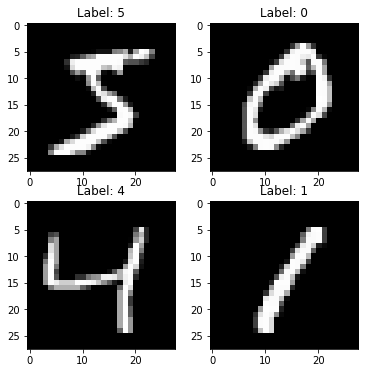

In [3]:
X_train,y_train,X_test,y_test,images,labels,test_images,test_labels=load_dataset()
plt.figure(figsize=[6,6])
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.title("Label: %i"%y_train[i])
  plt.imshow(X_train[i].reshape([28,28]),cmap='gray')
print('Train X shape...', X_train.shape)
print('Train y shape...', y_train.shape)
print('Test X shape...', X_test.shape)
print('Test y shape...', y_test.shape)

In [0]:
def Relu(x):
  return (x>0)*x 

In [0]:
def DeriveRelu(output):
  return output >=0
  

In [0]:
alpha=0.001
iterations=300
hidden_size=120
pixel_per_image=784
num_labels=10

In [0]:
weights_0_1=0.2*np.random.random((pixel_per_image,hidden_size))-0.1
weights_1_2=0.2*np.random.random((hidden_size,num_labels))-0.1

In [14]:
for j in range(iterations):
  error,correct_cnt =(0.0,0)
  for i in range(len(images)):
    layer_0=images[i:i+1]
    layer_1=Relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error +=np.sum((labels[i:i+1]-layer_2)**2)
    correct_cnt +=int(np.argmax(layer_2)==np.argmax(labels[i:i+1]))
    layer_2_delta=(labels[i:i+1]-layer_2)
    layer_1_delta=layer_2_delta.dot(weights_1_2.T)*DeriveRelu(layer_1)
    weights_1_2 +=alpha*layer_1.T.dot(layer_2_delta)
    weights_0_1+=alpha*layer_0.T.dot(layer_1_delta)
  print('Train error- '+str(error/float(len(images)))[0:5]+' '+' Train accuracy- '+str(correct_cnt/float(len(images))))


Train error- 5.136  Train accuracy- 0.804
Train error- 5.111  Train accuracy- 0.798
Train error- 5.090  Train accuracy- 0.8
Train error- 5.069  Train accuracy- 0.797
Train error- 5.049  Train accuracy- 0.797
Train error- 5.031  Train accuracy- 0.798
Train error- 5.013  Train accuracy- 0.798
Train error- 4.996  Train accuracy- 0.799
Train error- 4.979  Train accuracy- 0.801
Train error- 4.962  Train accuracy- 0.803
Train error- 4.947  Train accuracy- 0.802
Train error- 4.933  Train accuracy- 0.802
Train error- 4.919  Train accuracy- 0.801
Train error- 4.905  Train accuracy- 0.801
Train error- 4.893  Train accuracy- 0.8
Train error- 4.879  Train accuracy- 0.8
Train error- 4.866  Train accuracy- 0.8
Train error- 4.853  Train accuracy- 0.801
Train error- 4.840  Train accuracy- 0.801
Train error- 4.828  Train accuracy- 0.801
Train error- 4.817  Train accuracy- 0.8
Train error- 4.806  Train accuracy- 0.8
Train error- 4.795  Train accuracy- 0.799
Train error- 4.784  Train accuracy- 0.8
Train 

In [15]:
if (j%10==0 or j == iterations-1):
  error,correct_cnt =(0.0,0)
  for i in range(len(test_images)):
    layer_0=test_images[i:i+1]
    layer_1=Relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error+=np.sum((test_labels[i:i+1]-layer_2) **2)
    correct_cnt+=int(np.argmax(layer_2)==np.argmax(test_labels[i:i+1]))
    print(reprlib.repr('Test error- '+str(error/float(len(test_images)))[0:5]+' '+"Test accuracy- "+str(correct_cnt/float(len(test_images)))))

Streaming output truncated to the last 5000 lines.
'Test error- ...uracy- 0.2392'
'Test error- ...uracy- 0.2393'
'Test error- ...uracy- 0.2394'
'Test error- ...uracy- 0.2395'
'Test error- ...uracy- 0.2395'
'Test error- ...uracy- 0.2395'
'Test error- ...uracy- 0.2396'
'Test error- ...uracy- 0.2396'
'Test error- ...uracy- 0.2396'
'Test error- ...uracy- 0.2397'
'Test error- ...uracy- 0.2398'
'Test error- ...uracy- 0.2399'
'Test error- ...ccuracy- 0.24'
'Test error- ...ccuracy- 0.24'
'Test error- ...ccuracy- 0.24'
'Test error- ...uracy- 0.2401'
'Test error- ...uracy- 0.2402'
'Test error- ...uracy- 0.2403'
'Test error- ...uracy- 0.2403'
'Test error- ...uracy- 0.2404'
'Test error- ...uracy- 0.2405'
'Test error- ...uracy- 0.2406'
'Test error- ...uracy- 0.2407'
'Test error- ...uracy- 0.2408'
'Test error- ...uracy- 0.2409'
'Test error- ...curacy- 0.241'
'Test error- ...curacy- 0.241'
'Test error- ...curacy- 0.241'
'Test error- ...uracy- 0.2411'
'Test error- ...uracy- 0.2412'
'Test error- ...ura

# Code With Dropout

In [16]:
for j in range(iterations):
  error,correct_cnt =(0.0,0)
  for i in range(len(images)):
    layer_0=images[i:i+1]
    dropout_mask=np.random.randint(8,size=layer_1.shape)
    layer_1*=dropout_mask*8
    layer_1=Relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error +=np.sum((labels[i:i+1]-layer_2)**2)
    correct_cnt +=int(np.argmax(layer_2)==np.argmax(labels[i:i+1]))
    layer_2_delta=(labels[i:i+1]-layer_2)
    layer_1_delta=layer_2_delta.dot(weights_1_2.T)*DeriveRelu(layer_1)

    layer_1_delta*=dropout_mask
    weights_1_2 +=alpha*layer_1.T.dot(layer_2_delta)
    weights_0_1+=alpha*layer_0.T.dot(layer_1_delta)
  print('Train error- '+str(error/float(len(images)))[0:5]+' '+' Train accuracy- '+str(correct_cnt/float(len(images))))

Train error- 24.43  Train accuracy- 0.575
Train error- 14.00  Train accuracy- 0.634
Train error- 10.87  Train accuracy- 0.648
Train error- 10.01  Train accuracy- 0.671
Train error- 9.066  Train accuracy- 0.705
Train error- 7.752  Train accuracy- 0.721
Train error- 7.533  Train accuracy- 0.724
Train error- 7.152  Train accuracy- 0.747
Train error- 6.817  Train accuracy- 0.738
Train error- 6.556  Train accuracy- 0.743
Train error- 6.666  Train accuracy- 0.742
Train error- 7.191  Train accuracy- 0.742
Train error- 7.372  Train accuracy- 0.735
Train error- 6.875  Train accuracy- 0.742
Train error- 6.614  Train accuracy- 0.748
Train error- 6.596  Train accuracy- 0.758
Train error- 6.359  Train accuracy- 0.749
Train error- 6.660  Train accuracy- 0.748
Train error- 6.383  Train accuracy- 0.77
Train error- 6.228  Train accuracy- 0.76
Train error- 5.989  Train accuracy- 0.768
Train error- 5.883  Train accuracy- 0.769
Train error- 6.119  Train accuracy- 0.761
Train error- 6.066  Train accuracy- 

In [17]:
if (j%10==0 or j == iterations-1):
  error,correct_cnt =(0.0,0)
  for i in range(len(test_images)):
    layer_0=test_images[i:i+1]
    layer_1=Relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error+=np.sum((test_labels[i:i+1]-layer_2) **2)
    correct_cnt+=int(np.argmax(layer_2)==np.argmax(test_labels[i:i+1]))
    print('Test error- '+str(error/float(len(test_images)))[0:5]+' '+"Test accuracy- "+str(correct_cnt/float(len(test_images))))

Streaming output truncated to the last 5000 lines.
Test error- 9.175 Test accuracy- 0.2533
Test error- 9.177 Test accuracy- 0.2534
Test error- 9.177 Test accuracy- 0.2535
Test error- 9.178 Test accuracy- 0.2536
Test error- 9.179 Test accuracy- 0.2536
Test error- 9.179 Test accuracy- 0.2536
Test error- 9.181 Test accuracy- 0.2537
Test error- 9.181 Test accuracy- 0.2537
Test error- 9.187 Test accuracy- 0.2537
Test error- 9.187 Test accuracy- 0.2538
Test error- 9.188 Test accuracy- 0.2539
Test error- 9.189 Test accuracy- 0.254
Test error- 9.189 Test accuracy- 0.254
Test error- 9.189 Test accuracy- 0.254
Test error- 9.197 Test accuracy- 0.254
Test error- 9.199 Test accuracy- 0.2541
Test error- 9.205 Test accuracy- 0.2541
Test error- 9.207 Test accuracy- 0.2542
Test error- 9.209 Test accuracy- 0.2542
Test error- 9.210 Test accuracy- 0.2543
Test error- 9.211 Test accuracy- 0.2544
Test error- 9.212 Test accuracy- 0.2545
Test error- 9.212 Test accuracy- 0.2546
Test error- 9.214 Test accuracy- 

#Mini-Batch Gradient Descent

In [0]:
batch_size=1000
for j in range(iterations):
  error,correct_cnt=(0.0,0)
  for i in range(int(len(images)/ batch_size)):
    batch_start, batch_end =((i*batch_size),((i+1)*batch_size))
    #print(batch_start,batch_end)
    layer_0=images[batch_start:batch_end]
    layer_1=Relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error +=np.sum((labels[batch_start:batch_end]-layer_2)**2)
    for k in range(batch_size):
      correct_cnt +=int(np.argmax(layer_2[k:k+1])==np.argmax(labels[batch_start:batch_end]))
      layer_2_delta=(labels[batch_start:batch_end]-layer_2)
      layer_1_delta=layer_2_delta.dot(weights_1_2.T)*DeriveRelu(layer_1)
      weights_1_2 +=alpha*layer_1.T.dot(layer_2_delta)
      weights_0_1+=alpha*layer_0.T.dot(layer_1_delta)
  print('Train error- '+str(error/float(len(images)))[0:5]+' '+' Train accuracy- '+str(correct_cnt/float(len(images))))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  


Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error- nan  Train accuracy- 0.0
Train error-

In [0]:
if (j%10==0 or j == iterations-1):
  error,correct_cnt =(0.0,0)
  for i in range(len(test_images)):
    layer_0=test_images[i:i+1]
    layer_1=relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error+=np.sum((test_labels[i:i+1]-layer_2) **2)
    correct_cnt+=int(np.argmax(layer_2)==np.argmax(test_labels[i:i+1]))
    print('Test error- '+str(error/float(len(test_images)))[0:5]+' '+"Test accuracy- "+str(correct_cnt/float(len(test_images))))